# Cuaderno 16: Aspectos avanzados

En este cuaderno revisaremos funcionalidad adicional de Python y `pandas` que puede resultar útil para las tareas comunes en el procesamiento y análisis de datos.

Empezamos por importar los módulos de `pandas`y `numpy`:

In [3]:
# importar pandas y NumPy
import numpy as np
import pandas as pd

## Trabajando con APIs

Mucha información hoy en día está disponible en Internet a través de una tecnología conocida como [Web API](https://en.wikipedia.org/wiki/Web_API) que permite a un computador comunicarse con servidores a través de *puntos de acceso (endpoints)* empleando un sistema de mensajería tipo *petición-respuesta (request-response)*. La transmisión de información se realiza típicamente en uno de dos formatos: [JSON](https://en.wikipedia.org/wiki/JSON) o [XML](https://en.wikipedia.org/wiki/XML).

Por ejemplo, la aplicación [SalvaVidas](https://covidmodemat.epn.edu.ec/#/) desarrollada en el ModeMat para difundir indicadores acerca del avance de la pandemia de COVID-19 en el Ecuador, utiliza un tipo de API basado conocido como REST-API y que está configurado para transmitir los datos en formato JSON. En el siguiente punto de acceso puede consultarse la evolución del número de casos totales a nivel nacional desde el inicio de la epidemia:

https://covidmodemat.epn.edu.ec/api/evolucion/

Es posible acceder a esta información desde Python utilizando los módulos `urllib` y `json`:

In [1]:
import urllib.request, json
url = "https://covidmodemat.epn.edu.ec/api/evolucion/"
response = urllib.request.urlopen(url)
datos = json.loads(response.read())
print(datos)

[{'fecha': '2020-03-13T23:59:59', 'total_casos': 23}, {'fecha': '2020-03-14T23:59:59', 'total_casos': 28}, {'fecha': '2020-03-15T23:59:59', 'total_casos': 37}, {'fecha': '2020-03-16T23:59:59', 'total_casos': 58}, {'fecha': '2020-03-17T23:59:59', 'total_casos': 111}, {'fecha': '2020-03-18T23:59:59', 'total_casos': 168}, {'fecha': '2020-03-19T23:59:59', 'total_casos': 260}, {'fecha': '2020-03-20T23:59:59', 'total_casos': 426}, {'fecha': '2020-03-21T23:59:59', 'total_casos': 532}, {'fecha': '2020-03-22T23:59:59', 'total_casos': 789}, {'fecha': '2020-03-23T23:59:59', 'total_casos': 981}, {'fecha': '2020-03-24T23:59:59', 'total_casos': 1049}, {'fecha': '2020-03-25T23:59:59', 'total_casos': 1211}, {'fecha': '2020-03-26T23:59:59', 'total_casos': 1403}, {'fecha': '2020-03-27T23:59:59', 'total_casos': 1627}, {'fecha': '2020-03-28T23:59:59', 'total_casos': 1835}, {'fecha': '2020-03-29T23:59:59', 'total_casos': 1889}, {'fecha': '2020-03-30T23:59:59', 'total_casos': 1965}, {'fecha': '2020-03-31T23

La función `urllib.request.urlopen` permite consultar (*consumir*) un punto de acceso especificando su dirección (URL) y devuelve un objeto de la clase `HTTPResponse` que contiene la información solicitada, en este caso en formato JSON. La función `json.loads` permite recuperar esta información en una lista de diccionarios que en este ejemplo es asignada a la variable `datos`.

Podemos usar el constructor `pd.DataFrame` para poner la información de la variable `datos` en un DataFrame:

In [4]:
dfevolucion= pd.DataFrame(datos)
display(dfevolucion)

,fecha,total_casos
0,2020-03-13T23:59:59,23
1,2020-03-14T23:59:59,28
2,2020-03-15T23:59:59,37
3,2020-03-16T23:59:59,58
4,2020-03-17T23:59:59,111
...,...,...
362,2021-03-10T23:59:59,296841
363,2021-03-11T23:59:59,297957
364,2021-03-12T23:59:59,299216
365,2021-03-13T23:59:59,300666


Una vez en el formato de DataFrame, la información puede procesarse/analizarse usando la funcionalidad disponible en `pandas`. Por ejemplo, podemos transformar el DataFrame en una serie que tiene el número de casos indexado por la fecha:

In [5]:
dfevolucion['fecha']= pd.to_datetime(dfevolucion['fecha'])
dfevolucion.set_index('fecha', inplace= True)
print(dfevolucion)

                     total_casos
fecha                           
2020-03-13 23:59:59           23
2020-03-14 23:59:59           28
2020-03-15 23:59:59           37
2020-03-16 23:59:59           58
2020-03-17 23:59:59          111
...                          ...
2021-03-10 23:59:59       296841
2021-03-11 23:59:59       297957
2021-03-12 23:59:59       299216
2021-03-13 23:59:59       300666
2021-03-14 08:00:00       302498

[367 rows x 1 columns]


Usando el método `resample` podemos filtrar los datos del día final de cada mes:

In [6]:
dfevolucion2 = dfevolucion.resample('M').max()
print(dfevolucion2)

            total_casos
fecha                  
2020-03-31         2301
2020-04-30        16400
2020-05-31        30142
2020-06-30        47386
2020-07-31        75414
2020-08-31       104811
2020-09-30       137047
2020-10-31       167147
2020-11-30       192685
2020-12-31       212512
2021-01-31       250828
2021-02-28       286155
2021-03-31       302498


## Graficando con `matplotlib`

El método `plot` de una serie permite representarla gráficamente. Pandas utiliza para ello la funcionalidad de la biblioteca `matplotlib`:

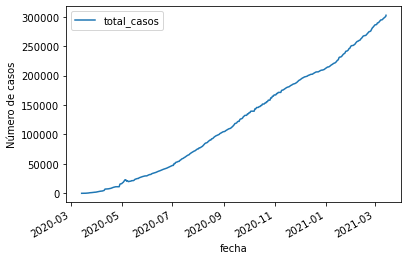

In [7]:
import matplotlib.pyplot as plt
dfevolucion.plot()
plt.ylabel('Número de casos');

La biblioteca configura automáticamente algunas opciones. Por ejemplo, observar cómo cambian los rótulos en el eje horizontal al graficar `dfevolucion2` que contiene datos con frecuencia mensual:

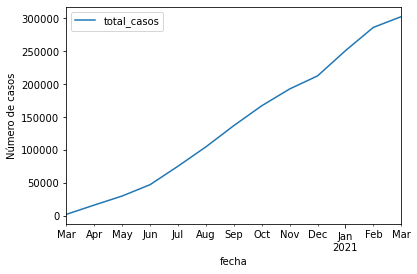

In [8]:
dfevolucion2.plot()
plt.ylabel('Número de casos');

Supongamos que en lugar del número total queremos estudiar el número diario de casos. Para ello, podemos emplear el método `shift`, el cual permite desplazar los datos en una serie indexada por fechas-horas:

In [9]:
print(dfevolucion['total_casos'].shift(1))

fecha
2020-03-13 23:59:59         NaN
2020-03-14 23:59:59        23.0
2020-03-15 23:59:59        28.0
2020-03-16 23:59:59        37.0
2020-03-17 23:59:59        58.0
                         ...   
2021-03-10 23:59:59    295114.0
2021-03-11 23:59:59    296841.0
2021-03-12 23:59:59    297957.0
2021-03-13 23:59:59    299216.0
2021-03-14 08:00:00    300666.0
Name: total_casos, Length: 367, dtype: float64


Con esto, podemos agregar una columna `diarios` al DataFrame, que registre los casos diarios al restar la variación del total acumulado en dos días consecutivos:

In [10]:
dfevolucion['diarios']= dfevolucion['total_casos'] - dfevolucion['total_casos'].shift(1)
display(dfevolucion)

,total_casos,diarios
fecha,,
2020-03-13 23:59:59,23,NaN
2020-03-14 23:59:59,28,5.0
2020-03-15 23:59:59,37,9.0
2020-03-16 23:59:59,58,21.0
2020-03-17 23:59:59,111,53.0
...,...,...
2021-03-10 23:59:59,296841,1727.0
2021-03-11 23:59:59,297957,1116.0
2021-03-12 23:59:59,299216,1259.0


Podemos ahora graficar el número diario de casos:

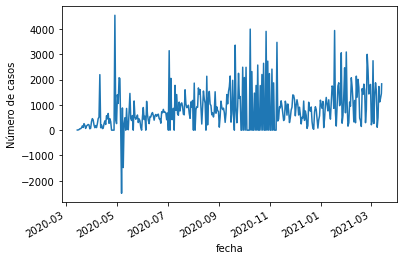

In [11]:
dfevolucion['diarios'].plot()
plt.ylabel('Número de casos');

Observamos que los datos tienen un comportamiento muy irregular. Para suavizar la curva, podemos calcular la media móvil de los últimos siete días. Empleamos para ello el método `rolling`:

In [12]:
dfevolucion['diarios_suavizado']= dfevolucion['diarios'].rolling(7).mean()
display(dfevolucion.head(20))

,total_casos,diarios,diarios_suavizado
fecha,,,
2020-03-13 23:59:59,23,NaN,NaN
2020-03-14 23:59:59,28,5.0,NaN
2020-03-15 23:59:59,37,9.0,NaN
2020-03-16 23:59:59,58,21.0,NaN
2020-03-17 23:59:59,111,53.0,NaN
2020-03-18 23:59:59,168,57.0,NaN
2020-03-19 23:59:59,260,92.0,NaN
2020-03-20 23:59:59,426,166.0,57.571429
2020-03-21 23:59:59,532,106.0,72.000000


Graficamos ahora las columnas `diarios` y `diarios_suavizado`  en la misma figura:

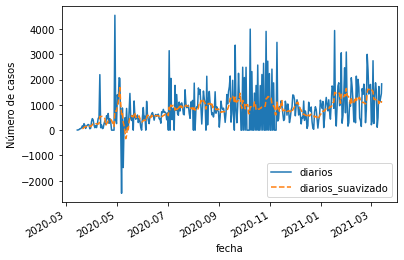

In [13]:
dfevolucion[['diarios', 'diarios_suavizado']].plot(style=['-', '--'])
plt.ylabel('Número de casos');

Para mayor información acerca de `matplotlib`, consultar la página oficial de la biblioteca: <https://matplotlib.org/>.